In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Data Description<br>
- MEMBER_NO-b       : ID Member
- FFP_DATE          : Frequent Flyer Program Join Date
- FIRST_FLIGHT_DATE : Tanggal Penerbangan pertama
- GENDER            : Jenis Kelamin
- FFP_TIER          : Tier dari Frequent Flyer Program
- WORK_CITY         : Kota Asal
- WORK_PROVINCE     : Provinsi Asal
- WORK_COUNTRY      : Negara Asal
- AGE               : Umur Customer
- LOAD_TIME         : Tanggal data diambil
- FLIGHT_COUNT      : Jumlah penerbangan Customer
- BP_SUM            : Rencana Perjalanan
- SUM_YR_1          : Fare Revenue
- SUM_YR_2          : Votes Prices
- SEG_KM_SUM        : Total jarak(km) penerbangan yg sudah dilakukan
- LAST_FLIGHT_DATE  : Tanggal penerbangan terakhir
- LAST_TO_END       : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir
- AVG_INTERVAL      : Rata-rata jarak waktu
- MAX_INTERVAL      : Maksimal jarak waktu
- EXCHANGE_COUNT    : Jumlah penukaran
- avg_discount      : Rata rata discount yang didapat customer
- Points_Sum        : Jumlah poin yang didapat customer
- Point_NotFlight   : point yang tidak digunakan oleh members

**Data Understanding**

# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('flight.csv')
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
47162,42084,12/8/2012,12/10/2012,Male,4,beijing,beijing,CN,41.0,3/31/2014,...,1228.0,4856,12/9/2013,114,91.000000,247,0,0.665855,2479,0
12912,50190,2/23/2011,2/23/2011,Male,4,changchun,jilin,CN,53.0,3/31/2014,...,11502.0,25456,3/4/2014,28,41.117647,200,0,0.709411,14134,0
514,29121,3/19/2005,3/19/2005,Male,5,guangzhou,guangdong,CN,41.0,3/31/2014,...,39537.0,116502,3/21/2014,11,8.839506,88,5,0.782969,87386,10
11228,37645,1/19/2012,2/10/2012,Male,4,shenzhen,guangdong,CN,31.0,3/31/2014,...,1991.0,30490,12/13/2013,110,28.523810,95,3,0.659706,14934,3
47915,44749,10/1/2007,10/1/2007,Male,4,dalian,liaoning,CN,58.0,3/31/2014,...,0.0,6042,7/8/2013,268,136.666667,246,1,0.513904,2173,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

- variabel MEMBER_NO dab FFP_TIER merupakan kategorik oleh karena itu terlebih dahulu diubah ke object

In [ ]:
df[["MEMBER_NO","FFP_TIER"]]=df[["MEMBER_NO","FFP_TIER"]].astype(np.object)

- Variabel 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME' dan 'LAST_FLIGHT_DATE' akan dirubah tipe datanya menjadi Datetime karena sebelumnya merupakan tipe data object
- Saat dilakukan perubahan tipe data pada **df['LAST_FLIGHT_DATE']= pd.to_datetime(df['LAST_FLIGHT_DATE']) output yang didapat adalah day is out of range for month: 2014/2/29  0:00:00**, setelah dilakukan pengecekan bahwa pada tahun 2014 bukanlah tahun kabisat. Sedemikian sehingga pada data tersebut, baris pada variabel 'LAST_FLIGHT_DATE' yang berisi tanggal '2014/2/29  0:00:00' akan diganti dengan '2014/2/28' dimana tanggal tersebut yang paling dekat dan masuk akal. Kemudian variabel tersebut akan dirubah menjadi 'LAST_FLIGHT_DATE_UPDATE' dan akan didrop.




In [ ]:
df['FFP_DATE']= pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['LAST_FLIGHT_DATE_UPDATE'] = np.where(df['LAST_FLIGHT_DATE']=='2014/2/29  0:00:00', '2014/2/28',df['LAST_FLIGHT_DATE'])
df['LAST_FLIGHT_DATE_UPDATE']= pd.to_datetime(df['LAST_FLIGHT_DATE_UPDATE'])

In [ ]:
#Drop variabel LAST_FLIGHT_DATE
#Run sekali saja pada code ini
df = df.drop('LAST_FLIGHT_DATE', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   MEMBER_NO                62988 non-null  object        
 1   FFP_DATE                 62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE        62988 non-null  datetime64[ns]
 3   GENDER                   62985 non-null  object        
 4   FFP_TIER                 62988 non-null  object        
 5   WORK_CITY                60719 non-null  object        
 6   WORK_PROVINCE            59740 non-null  object        
 7   WORK_COUNTRY             62962 non-null  object        
 8   AGE                      62568 non-null  float64       
 9   LOAD_TIME                62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT             62988 non-null  int64         
 11  BP_SUM                   62988 non-null  int64         
 12  SUM_YR_1                 62437 n

#### Memisahkan Variabel sesuai jenis datanya

In [ ]:
categoric = df.select_dtypes(include = 'object')
date = df.select_dtypes(include = 'datetime64[ns]')
numeric = df.select_dtypes(exclude = ('object','datetime64[ns]'))

**Describe Variabel Kategorik**

In [ ]:
df[categoric.columns].describe()

,MEMBER_NO,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,62988,62985,62988,60719,59740,62962
unique,62988,2,3,3234,1165,118
top,54993,Male,4,guangzhou,guangdong,CN
freq,1,48134,58066,9386,17509,57748


**Describe Variabel Numerik**

In [ ]:
df[numeric.columns].describe()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


**Describe Variabel Datetime**

In [ ]:
df[date.columns].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE_UPDATE
count,62988,62988,62988,62988
unique,3068,3406,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,184,96,62988,959
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


### Cek Duplicated Data

In [ ]:
df.duplicated().sum()

0

- Tidak ada data duplikat pada dataset tersebut

### Cek Missing Value

In [ ]:
df.isnull().sum()

MEMBER_NO                     0
FFP_DATE                      0
FIRST_FLIGHT_DATE             0
GENDER                        3
FFP_TIER                      0
WORK_CITY                  2269
WORK_PROVINCE              3248
WORK_COUNTRY                 26
AGE                         420
LOAD_TIME                     0
FLIGHT_COUNT                  0
BP_SUM                        0
SUM_YR_1                    551
SUM_YR_2                    138
SEG_KM_SUM                    0
LAST_TO_END                   0
AVG_INTERVAL                  0
MAX_INTERVAL                  0
EXCHANGE_COUNT                0
avg_discount                  0
Points_Sum                    0
Point_NotFlight               0
LAST_FLIGHT_DATE_UPDATE       0
dtype: int64

- Terdapat missing value pada beberapa variabel seperti yang terlihat pada info di atas
- Sebelum dilakukan pengisian data pada Missing Value, akan dicek terlebih dahulu distribusi pada tiap variabel numerik

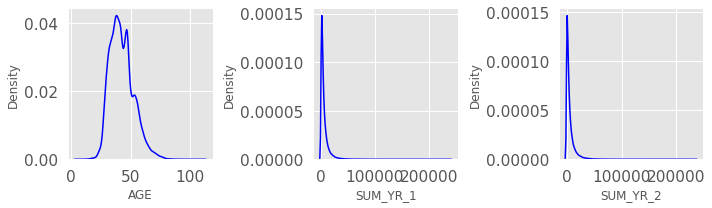

In [ ]:
features = ['AGE', 'SUM_YR_1','SUM_YR_2']
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (10,3)
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

- Pada variabel numerik yang terdapat missing value memiliki distribusi positively skewed sehingga dalam mengisi missing value akan digunakan **Median** 
- Untuk missing value pada variabel kategorik akan diisi dengan **Modus**

In [ ]:
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])
df['WORK_CITY'] = df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0])
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0])
df['WORK_COUNTRY'] = df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0])
df['AGE'] = df['AGE'].fillna(df['AGE'].median())
df['SUM_YR_1'] = df['SUM_YR_1'].fillna(df['SUM_YR_1'].median())
df['SUM_YR_2'] = df['SUM_YR_1'].fillna(df['SUM_YR_2'].median())

- Cek kembali Missing Value

In [ ]:
df.isnull().sum()

MEMBER_NO                  0
FFP_DATE                   0
FIRST_FLIGHT_DATE          0
GENDER                     0
FFP_TIER                   0
WORK_CITY                  0
WORK_PROVINCE              0
WORK_COUNTRY               0
AGE                        0
LOAD_TIME                  0
FLIGHT_COUNT               0
BP_SUM                     0
SUM_YR_1                   0
SUM_YR_2                   0
SEG_KM_SUM                 0
LAST_TO_END                0
AVG_INTERVAL               0
MAX_INTERVAL               0
EXCHANGE_COUNT             0
avg_discount               0
Points_Sum                 0
Point_NotFlight            0
LAST_FLIGHT_DATE_UPDATE    0
dtype: int64

- Sudah tidak ada Missing Value pada dataset tersebut

In [ ]:
# your code goes here!
df_fpp = df.groupby(['FFP_DATE']).agg({'MEMBER_NO':['nunique']}).reset_index()
df_fpp.columns = ['FFP_DATE','Frekuensi']

df_firstflight = df.groupby(['FIRST_FLIGHT_DATE']).agg({'MEMBER_NO':['nunique']}).reset_index()
df_firstflight.columns = ['FIRST_FLIGHT_DATE','Frekuensi']

df_loadtime = df.groupby(['LOAD_TIME']).agg({'MEMBER_NO':['nunique']}).reset_index()
df_loadtime.columns = ['LOAD_TIME','Frekuensi']

df_lastflight = df.groupby(['LAST_FLIGHT_DATE_UPDATE']).agg({'MEMBER_NO':['nunique']}).reset_index()
df_lastflight.columns = ['LAST_FLIGHT_DATE_UPDATE','Frekuensi']

## Statistik tiap variabel

#### Variabel Numerik

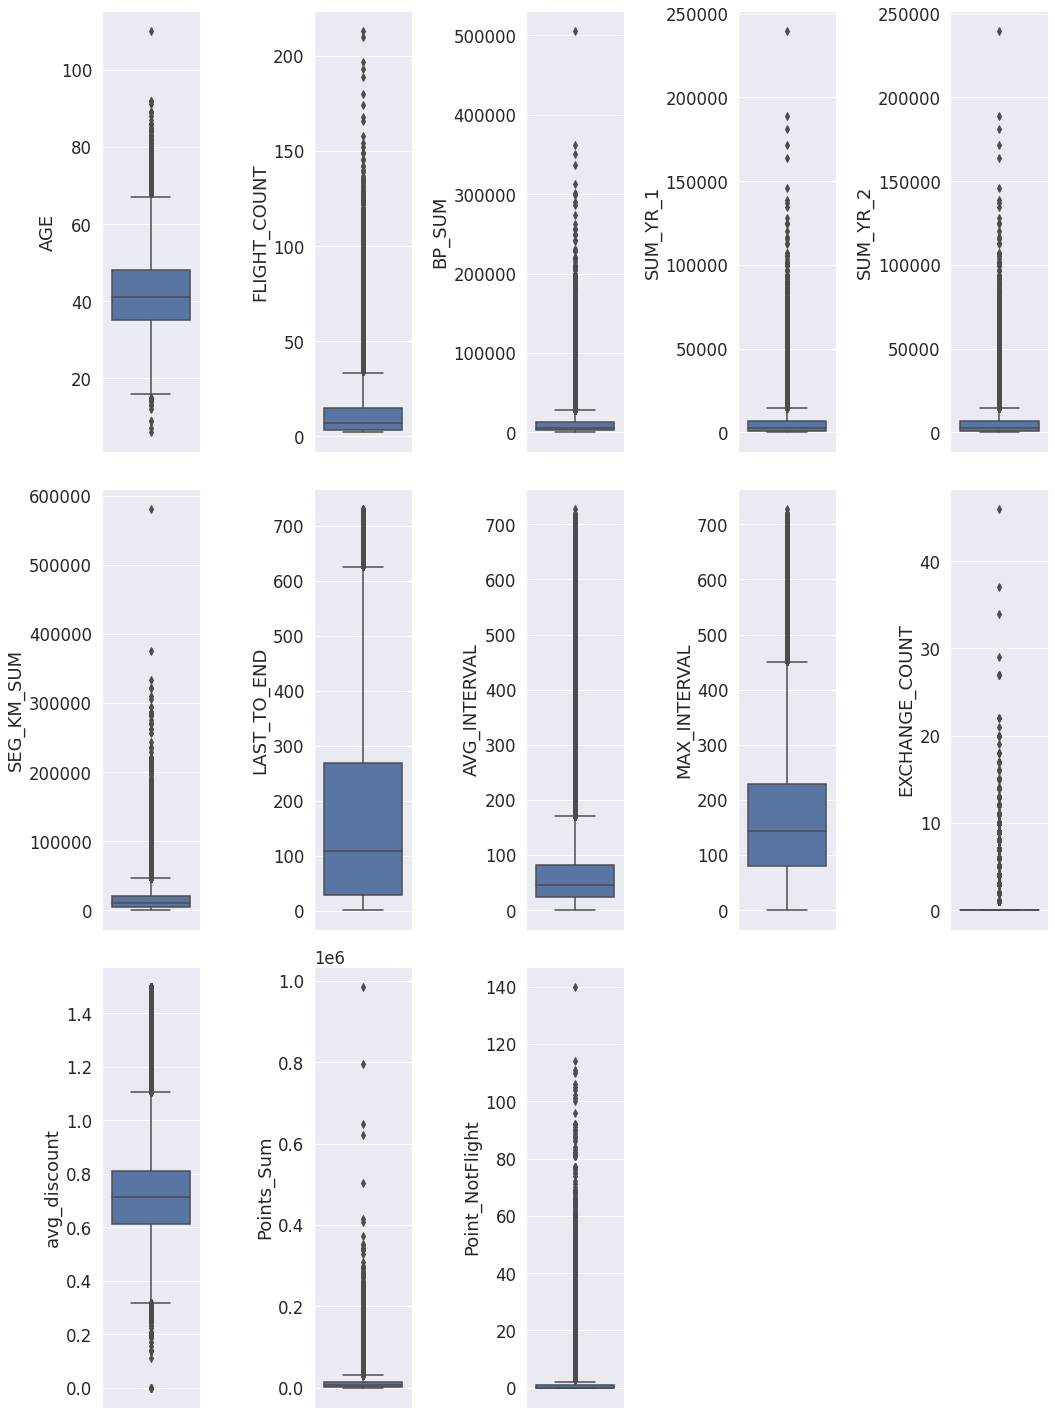

In [ ]:
features = numeric.columns
for i in range(0, len(features)):
    plt.rcParams['figure.figsize'] = (15,20)
    sns.set(font_scale=1.5)
    plt.subplot(3,5,i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

#### Variabel Kategorik

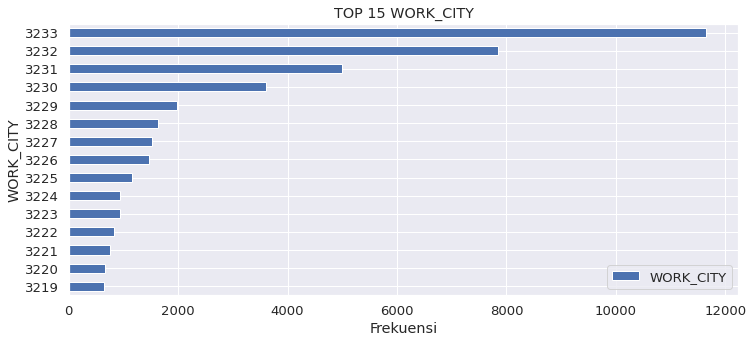

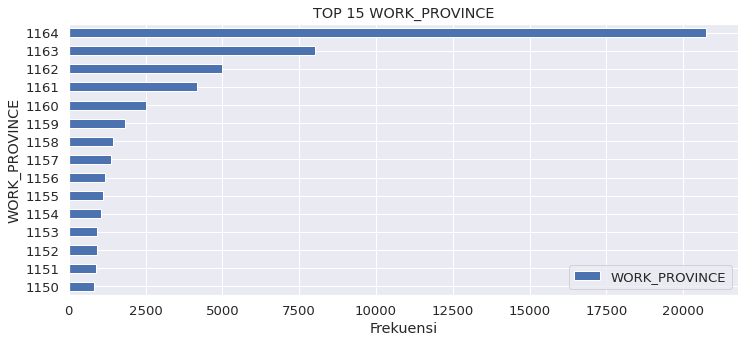

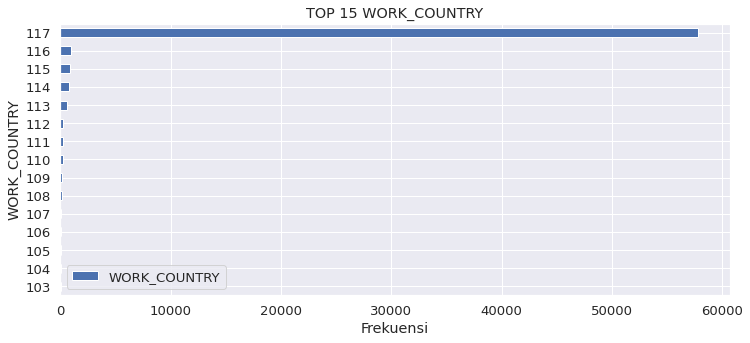

In [ ]:
fitur = ['WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

for i in range(0,len(fitur)):
    plt.rcParams['figure.figsize'] = (12,5)
    sns.set(font_scale=1.2)
    x = pd.DataFrame(df[fitur[i]].value_counts(ascending=True).reset_index()).tail(15)
    x.plot(kind='barh')
    plt.title('TOP 15 ' + fitur[i])
    plt.ylabel(fitur[i])
    plt.xlabel('Frekuensi')
    plt.show()
    print()

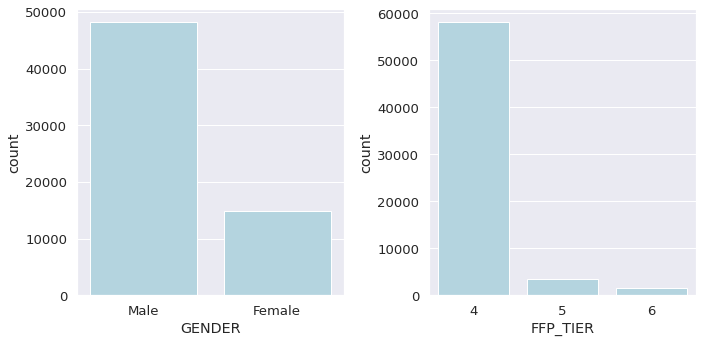

In [ ]:
fitur = ['GENDER', 'FFP_TIER']

for i in range(0, len(fitur)):
    plt.rcParams['figure.figsize'] = (10,5)
    plt.subplot(1, 2, i+1)
    sns.countplot(x=df[fitur[i]], color='lightblue')
    plt.tight_layout()

In [ ]:
print('Jumlah baris data :', df.shape[0])
print('Jumlah unique value variabel MEMBER_NO :', df['MEMBER_NO'].nunique())

Jumlah baris data : 62988
Jumlah unique value variabel MEMBER_NO : 62988


- Untuk variabel 'MEMBER_NO' total unique valuenya adalah 62988, sehingga tidak dilakukan plot karena tidak ada 'MEMBER_NO' yang frekuensinya lebih dari satu 

In [ ]:
pip install associations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from dython.nominal import associations

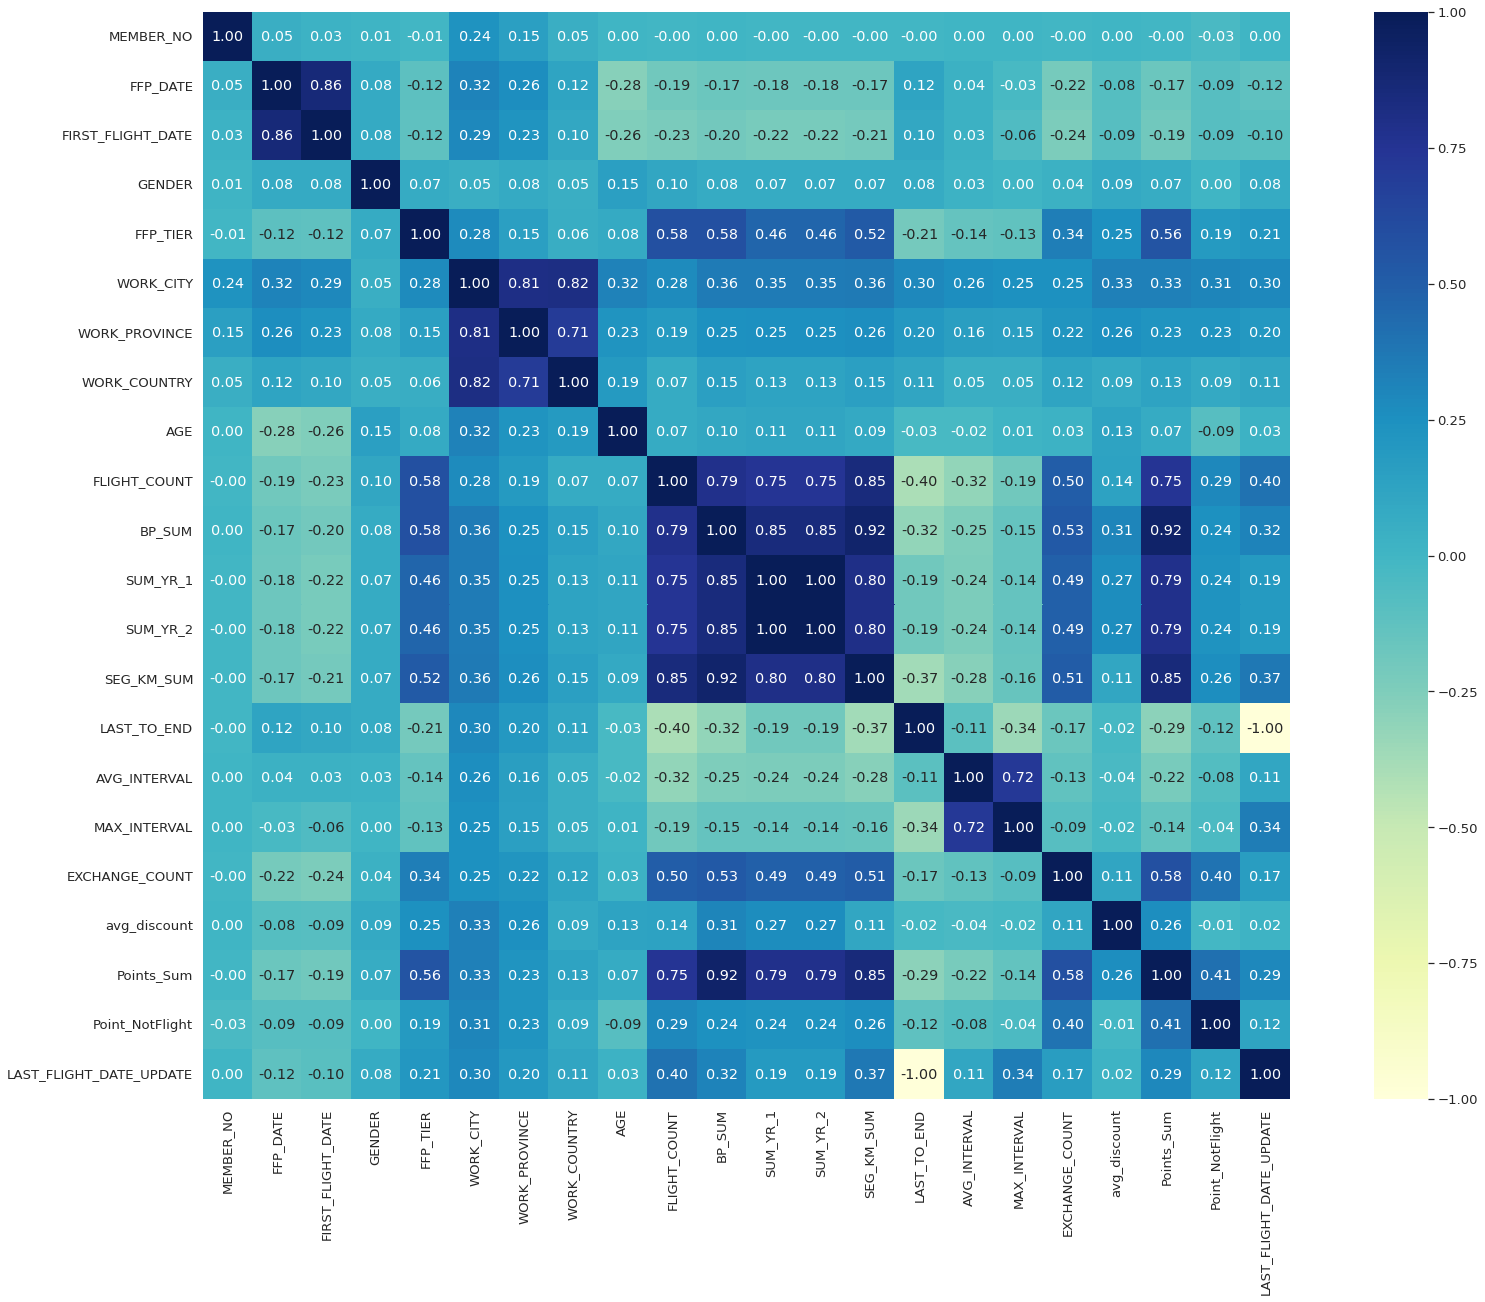

In [ ]:
# Instantiate a figure and axis object
df_corr = df.drop(['LOAD_TIME'], axis=1)
fig, ax = plt.subplots(figsize =(30, 20))
sns.set(font_scale=1.2)
# Estimate and generate Cramer's V association plot
cramers_v = associations(df_corr, nom_nom_assoc = 'cramer', ax = ax,cmap = "YlGnBu")
plt.show()

#### Variabel Date Time

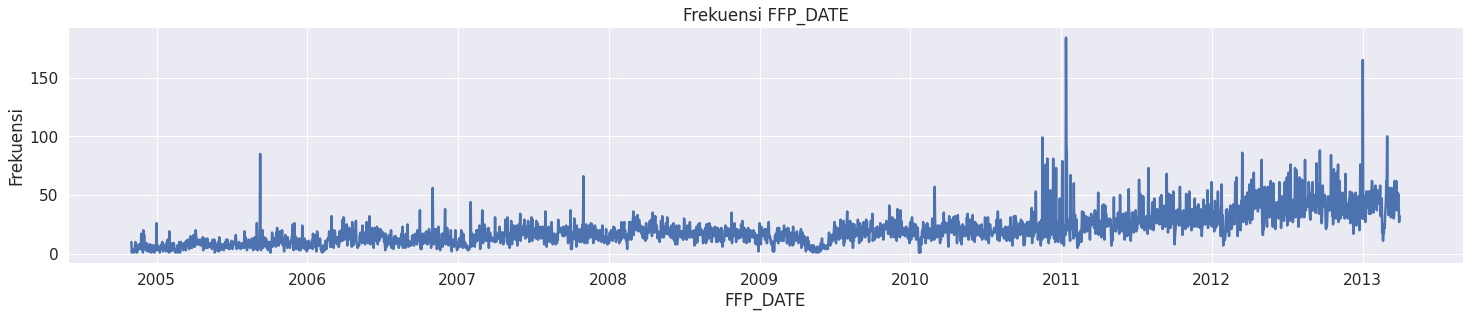

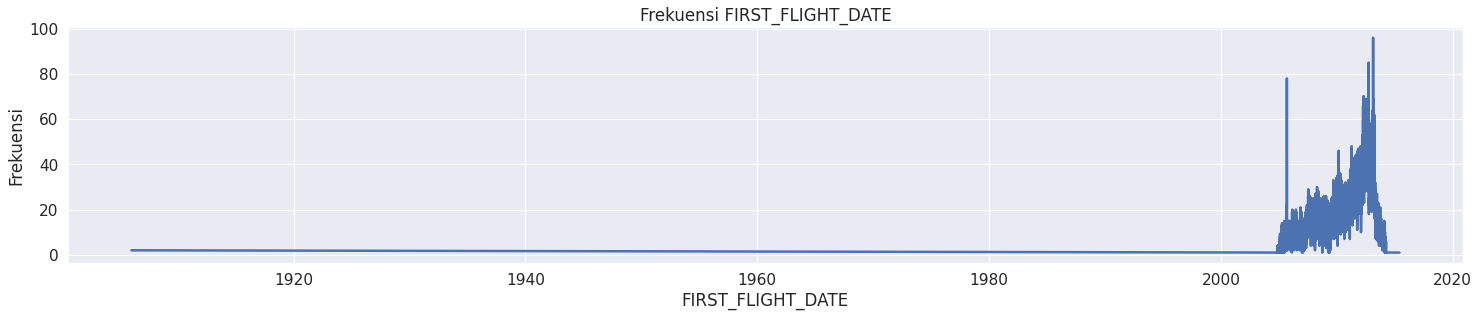

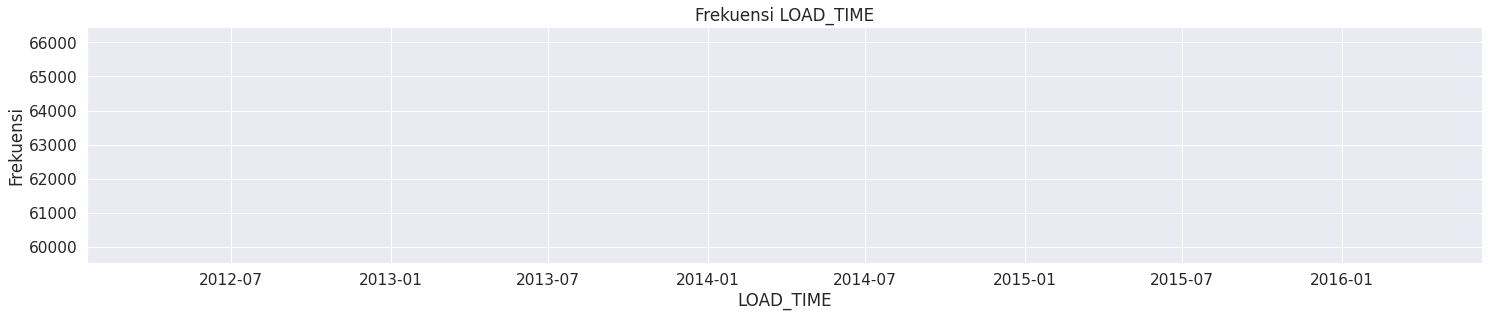

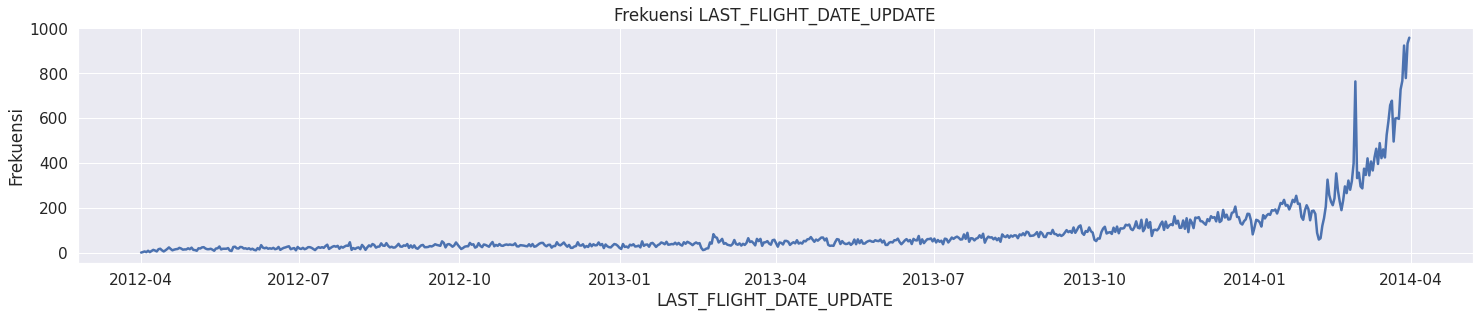

In [ ]:
plt.rcParams['figure.figsize'] = (25,20)
sns.set(font_scale=1.4)

plt.subplot(4, 1, 1)
sns.lineplot(df_fpp['FFP_DATE'],df_fpp['Frekuensi'],palette="tab10", linewidth=2.5)
plt.title('Frekuensi FFP_DATE')
plt.show()
print()

plt.subplot(4, 1, 2)
sns.lineplot(df_firstflight['FIRST_FLIGHT_DATE'],df_firstflight['Frekuensi'],palette="tab10", linewidth=2.5)
plt.title('Frekuensi FIRST_FLIGHT_DATE')
plt.show()
print()

plt.subplot(4, 1, 3)
sns.lineplot(df_loadtime['LOAD_TIME'],df_loadtime['Frekuensi'],palette="tab10", linewidth=2.5)
plt.title('Frekuensi LOAD_TIME')
plt.show()
print()

plt.subplot(4, 1, 4)
sns.lineplot(df_lastflight['LAST_FLIGHT_DATE_UPDATE'],df_lastflight['Frekuensi'],palette="tab10", linewidth=2.5)
plt.title('Frekuensi LAST_FLIGHT_DATE_UPDATE')
plt.show()

## FEATURE ENGINEERING 
Kami menggunakan pendekatan RFM dalam menentukan fitur yang akan dipilih.
RFM merupakan Recency, Frequency dan Monetary. Metriks RFM ini adalah indikator penting untuk mengetahui perilaku pelanggan. Karena Frekuensi dan Monetary mempengaruhi *lifetime value customers* dan Recency memengaruhi terhadap retensi pelanggan untuk mengukur terkait *engagement*.

Fitur penting: dipilih menggunakan model LRFMC Indicator
- L: Interval between joining and current time (LOAD_TIME - FPP_DATE)
- R: The interval between the latest consumption time and 
the current time (LAST_TO_END)
- F: Number of rides in the observation time window (FLIGHT_COUNT)
- M: Number of miles flown within the observation time 
window (SEG_KM_SUM)
- C: Average value of discount factor corresponding to class 
of cabin (AVG_DISCOUNT)



In [ ]:
# Membuat DataFrame LRFMC berdasarkan informasi di atas
LRFMC = df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']].reset_index()

# Membuat indikator L dengan berdasarkan kolom LOAD_TIME dikurangi FPP_DATE
LRFMC['L'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days/30

# Mengubah nama kolom agar sesuai dengan RFMC
LRFMC.rename(columns={'LAST_TO_END':'R','FLIGHT_COUNT':'F','SEG_KM_SUM':'M','avg_discount':'C'}, inplace = True)

# Membuat ulang judul menjadi LRFMC
ColumnsTitles = ['L', 'R', 'F', 'M', 'C']
LRFMC = LRFMC.reindex(columns=ColumnsTitles)
LRFMC

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658
...,...,...,...,...,...
62983,34.866667,297,2,1134,0.000000
62984,49.466667,89,4,8016,0.000000
62985,97.433333,29,2,2594,0.000000
62986,13.933333,400,2,3934,0.000000


Fitur telah berhasil dibuat menggunakan pendekatan model LRFMC indikator berdasarkan data asli. Data ini akan digunakan lebih lanjut untuk proses pengelompokkan sehingga mendapatkan analisis terkait customer value.

### Handling Outlier
Check distribusi data sebelum dilakukan handling outlier

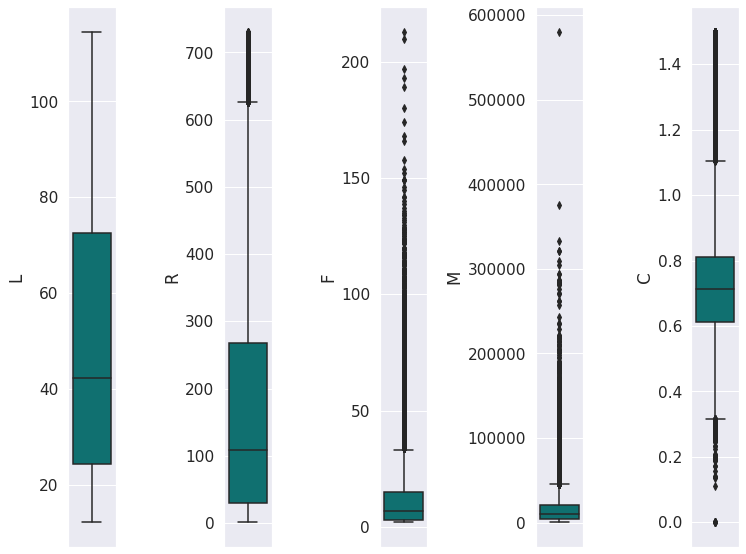

In [ ]:
plt.figure(figsize=(15,8))

# # plotting
# feat_num = list(df_IQR_LRFMC)
# for i in range(0, len(feat_num)):
#     plt.subplot(1, 7, i+1)
#     sns.boxplot(y=df_IQR_LRFMC[feat_num[i]],color='teal', orient='v')
#     plt.tight_layout()# adjust the figure size for better readability
# plt.figure(figsize=(15,8))

# plotting
feat_num = list(LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

Terdapat outlier pada data tersebut. Maka selanjutnya akan dilakukan handling outlier dengan log transform. Jika masih terdapat outlier, maka akan menghapusnya dengan berdasarkan IQR

In [ ]:
df_log_LRFMC = LRFMC.copy()
df_log_LRFMC['L'] = np.log10(LRFMC['L'] + 1)
df_log_LRFMC['R'] = np.log10(LRFMC['R'] + 1)
df_log_LRFMC['F'] = np.log10(LRFMC['F'] + 1)
df_log_LRFMC['M'] = np.log10(LRFMC['M'] + 1)
df_log_LRFMC['C'] = np.log10(LRFMC['C'] + 1)
df_log_LRFMC

,L,R,F,M,C
0,1.959995,0.301030,2.324282,5.763965,0.292619
1,1.942339,0.903090,2.149219,5.467873,0.352629
2,1.945304,1.079181,2.133539,5.452879,0.353084
3,1.840315,1.991226,1.380211,5.449227,0.320327
4,1.789110,0.778151,2.184691,5.491262,0.294611
...,...,...,...,...,...
62983,1.554691,2.474216,0.477121,3.054996,0.000000
62984,1.703005,1.954243,0.698970,3.904012,0.000000
62985,1.993142,1.477121,0.477121,3.414137,0.000000
62986,1.174157,2.603144,0.477121,3.594945,0.000000


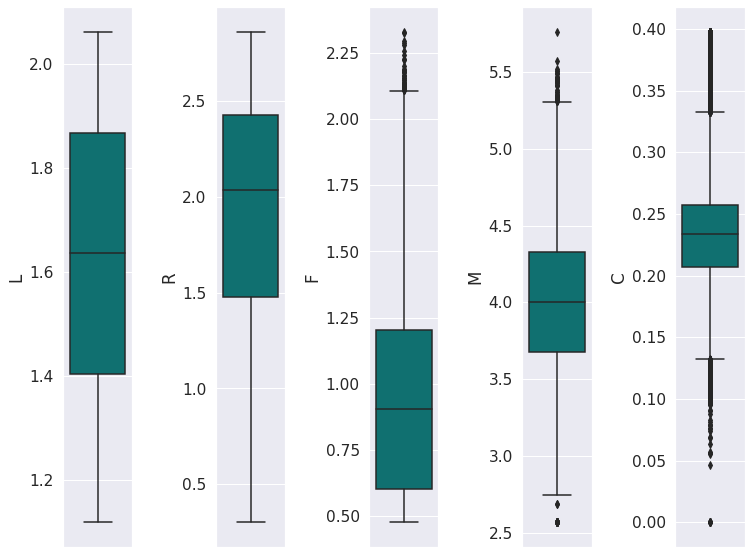

In [ ]:
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_log_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_log_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

Terlihat masih terdapat outlier, maka kemudian akan dihapus dengan berdasarkan IQR

In [ ]:
df_log_LRFMC.describe()

,L,R,F,M,C
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000
mean,1.628743,1.916599,0.940574,4.008851,0.233504
std,0.262866,0.636617,0.362145,0.442821,0.045491
min,1.119476,0.301030,0.477121,2.567026,0.000000
25%,1.404834,1.477121,0.602060,3.676511,0.207364
50%,1.636822,2.037426,0.903090,3.999783,0.233467
75%,1.867074,2.429752,1.204120,4.327813,0.257553
max,2.062833,2.864511,2.330414,5.763965,0.397940


In [ ]:
# Define IQR = Q3 - Q1
IQR = df_log_LRFMC.quantile(0.75) - df_log_LRFMC.quantile(0.25)
# Upper_limit = Q3 + 1.5 * IQR
upper_limit = df_log_LRFMC.quantile(0.75) + 1.5 * IQR
# Lower_limit = Q1 - 1.5 * IQR
lower_limit = df_log_LRFMC.quantile(0.25) - 1.5 * IQR

print(f'Kolom sebelum IQR outlier filter: {len(df_log_LRFMC)}')

# Filter data between the limits
df_IQR_LRFMC = df_log_LRFMC.copy()
df_IQR_LRFMC = df_log_LRFMC[(df_log_LRFMC >= lower_limit) & (df_log_LRFMC <= upper_limit)]
    
# drop nan data
df_IQR_LRFMC = df_IQR_LRFMC.dropna().reset_index(drop=True)

print('Kolom sesudah IQR outlier filter', len(df_IQR_LRFMC))
df_IQR_LRFMC

Kolom sebelum IQR outlier filter: 62988
Kolom sesudah IQR outlier filter 60063


,L,R,F,M,C
0,2.049606,1.544068,1.397940,5.278328,0.319568
1,1.601336,0.602060,1.556303,5.303503,0.300716
2,1.614897,1.361728,1.342423,5.268330,0.307391
3,1.339783,0.301030,2.045323,5.273207,0.304486
4,2.055633,1.204120,1.748188,5.187151,0.331630
...,...,...,...,...,...
60058,1.193125,2.605305,0.477121,2.873321,0.176091
60059,1.680033,2.675778,0.477121,2.921686,0.146128
60060,1.129260,2.572872,0.477121,2.873321,0.153815
60061,1.270291,2.698101,0.477121,2.881385,0.146128


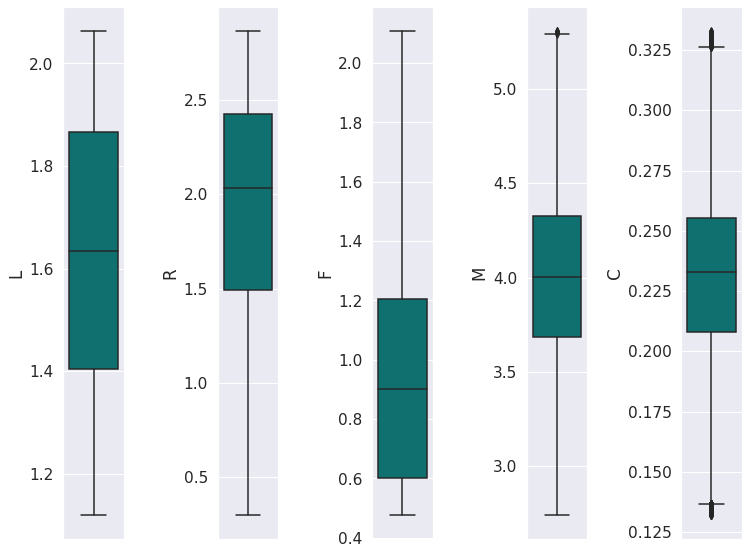

In [ ]:
plt.figure(figsize=(15,8))

# plotting
feat_num = list(df_IQR_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_IQR_LRFMC[feat_num[i]],color='teal', orient='v')
    plt.tight_layout()

### Check Dulicate Value Setelah Menghapus Outlier

In [ ]:
df_IQR_LRFMC.duplicated().sum()

89

Drop them!

In [ ]:
df_IQR_LRFMC = df_IQR_LRFMC.drop_duplicates().reset_index(drop=True)
df_IQR_LRFMC

,L,R,F,M,C
0,2.049606,1.544068,1.397940,5.278328,0.319568
1,1.601336,0.602060,1.556303,5.303503,0.300716
2,1.614897,1.361728,1.342423,5.268330,0.307391
3,1.339783,0.301030,2.045323,5.273207,0.304486
4,2.055633,1.204120,1.748188,5.187151,0.331630
...,...,...,...,...,...
59969,1.193125,2.605305,0.477121,2.873321,0.176091
59970,1.680033,2.675778,0.477121,2.921686,0.146128
59971,1.129260,2.572872,0.477121,2.873321,0.153815
59972,1.270291,2.698101,0.477121,2.881385,0.146128


### Standarisasi

In [ ]:
sc = StandardScaler()
data_std = sc.fit_transform(df_IQR_LRFMC.astype(float))

In [ ]:
data_std = pd.DataFrame(data=data_std, columns=df_IQR_LRFMC.columns)
data_std.head()

,L,R,F,M,C
0,1.608807,-0.586495,1.273476,2.900166,2.417048
1,-0.102317,-2.071131,1.716353,2.957794,1.902524
2,-0.050550,-0.873870,1.118216,2.877278,2.084692
3,-1.100710,-2.545564,3.083949,2.888443,2.005413
4,1.631815,-1.122265,2.252981,2.691448,2.746239


In [ ]:
data_std.describe()

,L,R,F,M,C
count,5.997400e+04,5.997400e+04,5.997400e+04,5.997400e+04,5.997400e+04
mean,-6.824167e-16,-2.653843e-16,-2.881315e-16,1.516482e-16,1.516482e-16
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.941659e+00,-2.545564e+00,-1.301688e+00,-2.904193e+00,-2.699902e+00
25%,-8.480531e-01,-6.695624e-01,-9.522838e-01,-7.487782e-01,-6.303469e-01
50%,2.803248e-02,1.847452e-01,-1.104225e-01,-1.282857e-02,4.832972e-02
75%,9.075453e-01,8.016957e-01,7.314387e-01,7.230149e-01,6.622584e-01
max,1.659297e+00,1.494566e+00,3.257022e+00,2.960124e+00,2.779014e+00


# Modeling

### Elbow Method

Mencari jumlah cluster yang ideal

In [ ]:
inertia=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

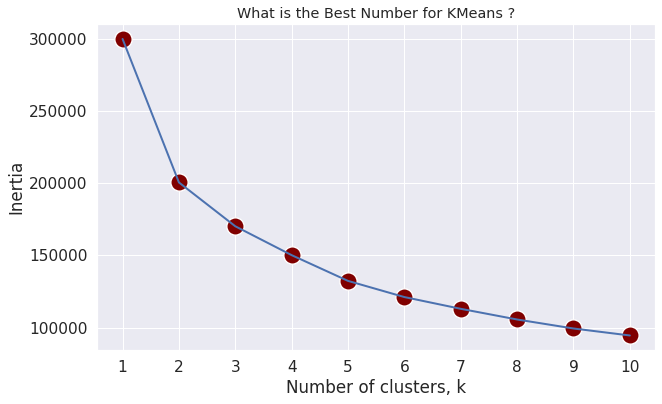

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1,11), y=inertia, linewidth=2)
sns.scatterplot(x=range(1,11), y=inertia, s=300, color='#800000')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(range(1,11))
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [ ]:
(pd.Series(inertia)-pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    33.143041
1    15.145269
2    11.755531
3    11.885020
4     8.463008
5     6.720885
6     6.553702
7     5.903915
8     4.869867
9          NaN
dtype: float64

Dari Elbow Method diatas dapat dilihat bahwa penambahan cluster dari 3 ke 4 turun signifikan dan penambahan cluster selanjutnya tidak terjadi penurunan signifikan sehingga kita bisa ambil kesimpulan bahwa cukup di 4 cluster saja untuk jumlah cluster yang optimal.

### K-Means

In [ ]:
kmeans = KMeans(n_clusters= 4, random_state=42)
kmeans.fit(data_std)

KMeans(n_clusters=4, random_state=42)

In [ ]:
data_std['clusters'] = kmeans.labels_
data_std.sample(5)

,L,R,F,M,C,clusters
53320,0.956481,-0.055773,-1.301688,-1.140731,-0.790414,1
13924,1.135669,-1.378728,0.479251,0.724336,0.319042,2
23179,0.771965,0.522882,0.276355,0.492904,-0.884960,1
24080,-0.824355,0.616692,0.653053,0.525169,-1.222395,0
40487,1.226888,1.135194,-1.301688,-0.899256,1.911093,3


In [ ]:
radar_plot = data_std.groupby('clusters').agg('mean').reset_index()
radar_plot

,clusters,L,R,F,M,C
0,0,-0.894331,-0.299611,0.334479,0.399037,0.020397
1,1,-0.096791,0.510839,-0.743608,-0.640758,-1.174360
2,2,0.737774,-0.860818,1.131563,1.044968,0.161267
3,3,0.076043,0.658052,-0.757518,-0.810023,0.801351


### Visualisasi Menggunakan PCA

In [ ]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = data_std['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,2.766644,-2.635051,2
1,3.608218,-1.685461,2
2,2.633373,-1.664454,2
3,4.499536,-1.447302,2
4,3.479594,-2.942343,2


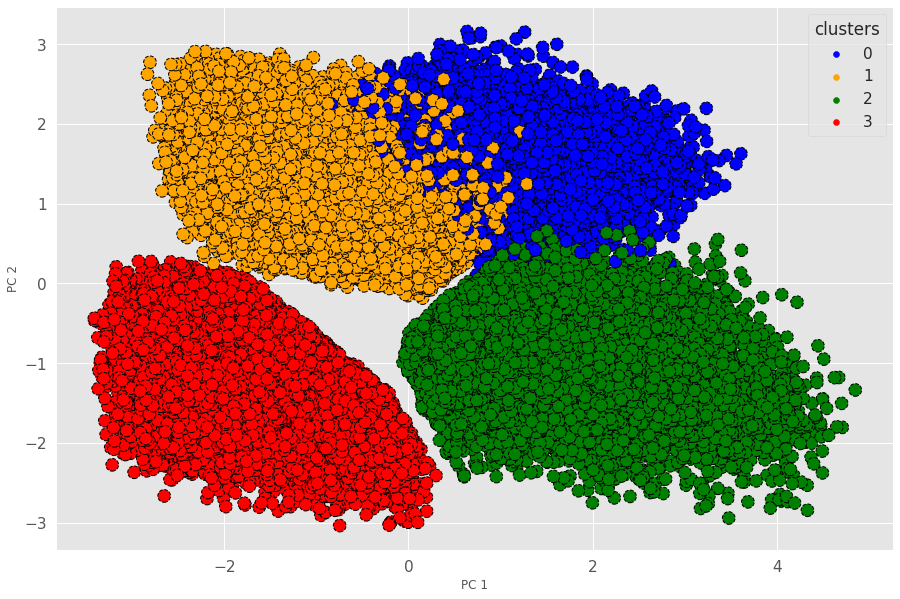

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette= ['blue', 'orange', 'green', 'red'],
    s=160,
    ax=ax
)

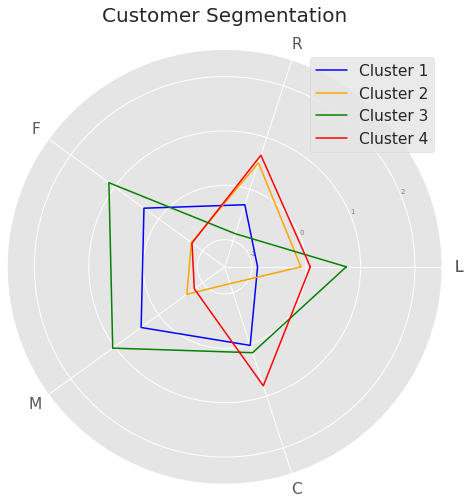

In [ ]:
category = ['L', 'R', 'F', 'M', 'C']
categories = [*category, category[0]]
color = ['blue', 'orange', 'green', 'red']
clusters = []

for i in range(0,4):
    num = []
    for cat in category:
        num.append(radar_plot[cat][i])
    num.append(radar_plot['L'][i])
    clusters.append(num)

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(clusters[0]))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
for i in range(0,4):
    plt.plot(label_loc, clusters[i], color=color[i], label=f'Cluster {i+1}')

plt.title('Customer Segmentation', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.legend()
plt.show()

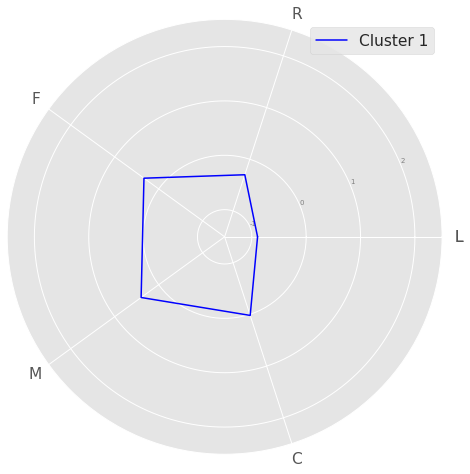

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[0], color=color[0], label = 'Cluster 1')
plt.legend()
plt.show()

- Cluster 1 memiliki nilai F (Number of rides), M (Number of miles) dan C (Average value of discount) yang lebih tinggi dari indikator yang lain
- Nilai L (Interval between joining and current time) terlihat paling kecil
- Kemungkinan mereka adalah customer yang mengambil perjalanan jauh dan  menggunakan discount

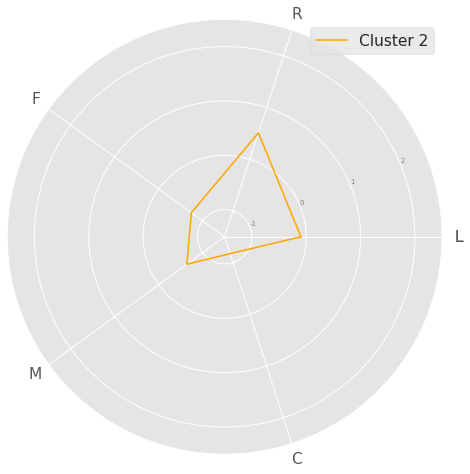

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[1], color=color[1], label = 'Cluster 2')
plt.legend()
plt.show()

- Cluster 2 memiliki nilai R (The interval between the latest consumption time and the current time) dan L (Interval between joining and current time) yang lebih tinggi dibanding indikator yang lain
- Nilai C (Average value of discount) terlihat paling kecil
- Kemungkinan mereka adalah customer lama yang akhir-akhir ini menggunakan pesawat kembali

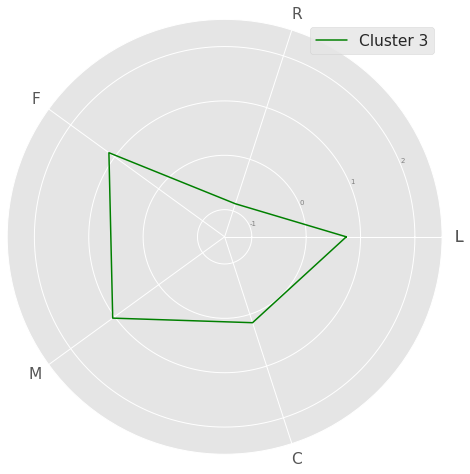

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[2], color=color[2], label = 'Cluster 3')
plt.legend()
plt.show()

- Cluster 3 memiliki nilai F (Number of rides), M (Number of miles), dan L (Interval between joining and current time) cukup tinggi dibanding indikator lainnya
- Nilai R (The interval between the latest consumption time and the current time) terlihat paling kecil
- Kemungkinan mereka adalah customer lama dan sering menggunakan pesawat namun belakangan terlihat tidak aktif  

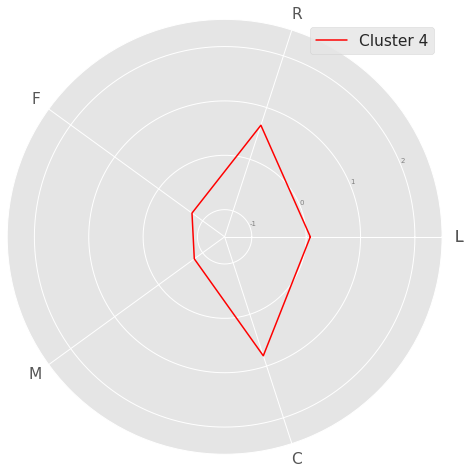

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.yticks([-1,0,1,2], ["-1","0","1","2"], color="grey", size=7)
plt.ylim(-1.5,2.5)
plt.plot(label_loc, clusters[3], color=color[3], label = 'Cluster 4')
plt.legend()
plt.show()

- Cluster 4 memiliki nilai C (Average value of discount), R (The interval between the latest consumption time and the current time), L (Interval between joining and current time) yang relatif lebih tinggi dibanding indikator lainnya
- Nilai F (Number of rides) dan M (Number of miles) terlihat lebih kecil
- Kemungkinan mereka adalah customer lama yang tertarik dengan diskon dan mengambil rute perjalan yang pendek-pendek

### Statistik Fitur Setiap Cluster

In [ ]:
data_std.groupby('clusters').agg(['mean','median','std'])

L                             R                      \
              mean    median       std      mean    median       std   
clusters                                                               
0        -0.894331 -0.923520  0.604417 -0.299611 -0.157561  0.844163   
1        -0.096791 -0.081689  0.984064  0.510839  0.649605  0.723572   
2         0.737774  0.890907  0.648595 -0.860818 -0.844739  0.867225   
3         0.076043  0.170145  0.956371  0.658052  0.778136  0.649827   

                 F                             M                      \
              mean    median       std      mean    median       std   
clusters                                                               
0         0.334479  0.276355  0.587107  0.399037  0.388977  0.571213   
1        -0.743608 -0.681265  0.491058 -0.640758 -0.631546  0.624199   
2         1.131563  1.061716  0.723622  1.044968  1.013418  0.633317   
3        -0.757518 -0.952284  0.496617 -0.810023 -0.794224  0.663539   

                 C                      
              mean    median       std  
clusters                                
0         0.020397  0.021885  0.738647  
1        -1.174360 -1.093123  0.655156  
2         0.161267  0.149614  0.771849  
3         0.801351  0.714276  0.648576

## Karakteristik dan Strategi bisnis setiap cluster

### Cluster 1
Karakteristik : Cluster 1 adalah customer baru yang mengambil perjalanan jauh dengan menggunakan discount, ketika momen tertentu saja. Terlihat dari nilai R (The interval between the latest consumption time and the current time) yang cukup tinggi. Customer segmen ini berpotensi baik tetapi masih belum paham sepenuhnya mengenai produk dan promo yang ada.

Strategi Bisnis : Memberikan update informasi mengenai produk dan program promo yang tersedia. Karena customer baru lebih terbuka terhadap tawaran dan informasi. Jadi nanti diadakan voucher challenge, dimana nanti setiap stage nya ada voucher yang bisa diklaim untuk digunakan. Hal ini memudahkan untuk melihat keloyalan customer.



### Cluster 2
Karakteristik : Cluster 2 adalah customer lama yang akhir-akhir ini menggunakan pesawat kembali, dan tidak menggunakan diskon. Customer segmen ini kurang update informasi mengenai produk dan promo yang tersedia. Sehingga rentan beralih ke kompetitor lain yang harga murah.

Strategi Bisnis :  Aktif menginformasikan tentang fasilitas dari produk-produk dan diskon-diskon yang sedang berlaku. Customer bisa ditawarkan voucher diskon istimewa dengan periode pendek, supaya cepat tertarik dan tidak beralih ke kompetitor lain. Customer ditawarkan hadiah mewah dengan penukaran point loyal diperiode tertentu. 



### Cluster 3
Karakteristik : Cluster 3 adalah customer lama yang frekuensinya sering menggunakan pesawat dengan diskon. Customer segmen ini merupakan karakter customer loyal. Dimana secara otomatis akan selalu mencari tahu sendiri produk dan promo terbaru, tetapi tetap perlu dijaga rasa kepercayaannya.

Strategi Bisnis : Customer loyal lebih diprioritaskan dengan pendekatan emosional bukan komersial. Bisa dengan cara customer diberikan apresiasi terima kasih berupa barang/fasilitas/jasa agar tetap terjalin keterikatan secara emosional. Customer ditawarkan program prioritas khusus customer loyal agar mendapat keuntungan istimewa jangka panjang. Bisa juga ditawarkan hadiah mewah dengan penukaran point loyal diperiode tertentu. 



### Cluster 4
Karakteristik : Cluster 4 adalah customer lama yang tertarik ketika ada diskon besar saja dan mengambil rute perjalan yang pendek-pendek. Customer segmen ini perlu dibangun kembali kepercayaannya terhadap produk dan pelayanan yang tersedia. 

Strategi Bisnis : Memberikan informasi mengenai produk yang tersedia dan mengkonfirmasi ke customer mengenai kekurangan produk ataupun pelayanan yang dirasakan customer tersebut, supaya bisa ditingkatkan. Diberikan voucher challenge, dimana nanti setiap stage nya ada voucher yang bisa diklaim untuk digunakan. Ketika semakin tinggi stage yang sudah dicapai, harapannya kepercayaan customer kepada produk juga meningkat.

